# Analyse Exploratoire des Données (EDA)

## Contexte du scénario TikTok
Chez TikTok, notre mission est d'inspirer la créativité et d'apporter de la joie. Nos employés font preuve de curiosité et évoluent à la vitesse de la culture. Grâce à la structure horizontale de notre entreprise, vous aurez des possibilités dynamiques d'avoir un impact réel sur une entreprise en pleine expansion et de faire évoluer votre carrière.

Les utilisateurs de TikTok ont la possibilité de soumettre des rapports qui identifient les vidéos et les commentaires qui contiennent des revendications d'utilisateurs. Ces rapports identifient les contenus qui doivent être examinés par des modérateurs. Le processus génère un grand nombre de rapports d'utilisateurs qu'il est difficile d'examiner en temps voulu.

TikTok travaille à la mise au point d'un modèle prédictif capable de déterminer si une vidéo contient une revendication ou offre une opinion. Avec un modèle prédictif performant, TikTok peut réduire le nombre de rapports d'utilisateurs en attente et les classer par ordre de priorité de manière plus efficace.

Contexte du projet
L'équipe de TikTok chargée des données travaille sur le projet de classification des réclamations. Les tâches suivantes sont nécessaires avant que l'équipe puisse commencer le processus d'analyse des données :

AED et nettoyage

Sélectionner et construire le(s) type(s) de visualisation

Créer des graphiques pour visualiser les variables et les relations entre les variables

Partager vos résultats avec l'équipe TikTok

Votre mission
Vous effectuerez une analyse exploratoire des données sur les données du projet de classification des sinistres. Vous utiliserez également Tableau pour créer des visualisations pour un Résumé exécutif afin d'aider les parties prenantes non techniques à s'engager et à interagir avec les données.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("tiktok_dataset.csv")

In [3]:
data.head(10)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0
5,6,claim,8972200955,35,someone shared with me that gross domestic pro...,not verified,under review,336647.0,175546.0,62303.0,4293.0,1857.0
6,7,claim,4958886992,16,someone shared with me that elvis presley has ...,not verified,active,750345.0,486192.0,193911.0,8616.0,5446.0
7,8,claim,2270982263,41,someone shared with me that the best selling s...,not verified,active,547532.0,1072.0,50.0,22.0,11.0
8,9,claim,5235769692,50,someone shared with me that about half of the ...,not verified,active,24819.0,10160.0,1050.0,53.0,27.0
9,10,claim,4660861094,45,someone shared with me that it would take a 50...,verified,active,931587.0,171051.0,67739.0,4104.0,2540.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [5]:
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


De nombreuses variables semble contenir des valeurs abbérantes

In [6]:
data['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

il existe un certains equilibre

In [7]:
claims = data[data['claim_status'] == 'claim']
print('Moyenne des vues qui sont des réclamations:', claims['video_view_count'].mean())
print('Median des vues qui sont des réclamations:', claims['video_view_count'].median())
opinions = data[data['claim_status'] == 'opinion']
print('Moyenne des vues qui sont des opinions:', opinions['video_view_count'].mean())
print('Médiane des vues qui sont des opinions:', opinions['video_view_count'].median())

Moyenne des vues qui sont des réclamations: 501029.4527477102
Median des vues qui sont des réclamations: 501555.0
Moyenne des vues qui sont des opinions: 4956.43224989447
Médiane des vues qui sont des opinions: 4953.0


La moyenne et la médiane sont proches l'une de l'autre dans chaque catégorie de revendication, mais il existe une grande différence dans le nombre de vues entre les vidéos classées comme revendications et celles classées comme opinions.

In [8]:
# On regroupe le statu des vidéos en fonction du statu des utilisateurs

data.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

Il y a beaucoup plus de vidéos de revendication provenant d'auteurs bannis que de vidéos d'opinion provenant d'auteurs bannis. Cela pourrait signifier plusieurs choses, notamment :
* Les vidéos de revendication sont surveillées plus strictement que les vidéos d'opinion.
* Les auteurs doivent respecter un ensemble de règles plus strictes lorsqu'ils publient une revendication par rapport à une opinion.

In [9]:

data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['mean', 'median'],
     'video_like_count': ['mean', 'median'],
     'video_share_count': ['mean', 'median']})

video_view_count           video_like_count            \
                              mean    median             mean    median   
author_ban_status                                                         
active               215927.039524    8616.0     71036.533836    2222.0   
banned               445845.439144  448201.0    153017.236697  105573.0   
under review         392204.836399  365245.5    128718.050339   71204.5   

                  video_share_count           
                               mean   median  
author_ban_status                             
active                 14111.466164    437.0  
banned                 29998.942508  14468.0  
under review           25774.696999   9444.0

In [10]:
# Quel est le nombre médian de partage vidéo de chaque statut

data.groupby(['author_ban_status']).median(numeric_only=True)[
    ['video_share_count']]

,video_share_count
author_ban_status,
active,437.0
banned,14468.0
under review,9444.0


Les auteurs interdits ont un décompte médian de partage qui représente 33 fois le nombre médian d'actions d'auteurs actifs!Explorez cela plus en profondeur.

In [11]:

data.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

Quelques observations se distinguent:
* Les auteurs interdits et ceux en cours d'examen obtiennent beaucoup plus de vues, de goûts et de partages que les auteurs actifs.
* Dans la plupart des groupes, la moyenne est beaucoup plus grande que la médiane, ce qui indique qu'il existe des vidéos avec un nombre d'engagement très élevé.

In [12]:
# Créer une colonne likes_per_view
data['likes_per_view'] = data['video_like_count'] / data['video_view_count']

# Créer une colonne Commentaire_per_view
data['comments_per_view'] = data['video_comment_count'] / data['video_view_count']

# Créer une colonne Shares_per_View
data['shares_per_view'] = data['video_share_count'] / data['video_view_count']

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [13]:
data.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

Les vidéos bannies ont un taux de likes et de partages légèrement plus élevés, ce qui suggère que certains contenus populaires et engageants sont supprimés.

Les vidéos en "under review" ont un taux de commentaires plus élevé, ce qui peut signifier que le volume de discussion autour d’un contenu peut attirer l’attention des modérateurs.

Les vidéos "opinion" ont des taux d’engagement plus faibles que les vidéos "claim", ce qui peut refléter une moindre viralité des contenus d'opinion.

Les différences ne sont pas massives, ce qui suggère que le bannissement dépend d’autres critères que les métriques d’engagement (ex : signalements, modération manuelle, contenu inapproprié).

## Visualisations

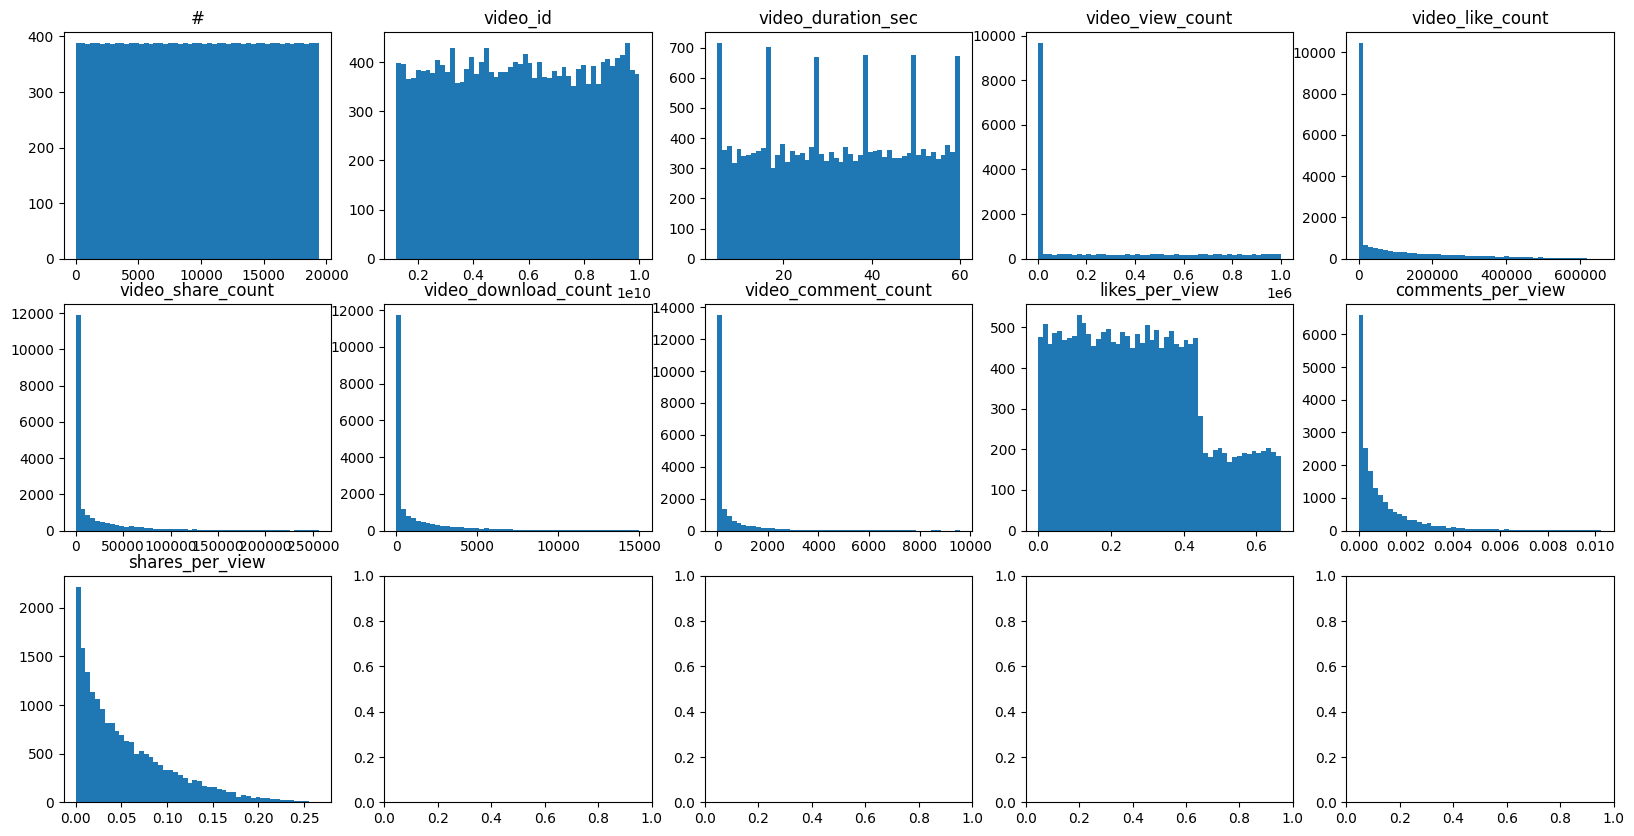

In [14]:
fig,axs = plt.subplots(3,5, figsize=(20,10))
axs = axs.ravel()

num_cols = data.select_dtypes(include=['number']).columns
for i, column in enumerate(num_cols):
    axs[i].hist(data[column],bins= 50)
    axs[i].set_title(column)
    
plt.show()

Text(0.5, 1.0, 'Video duration histogram')

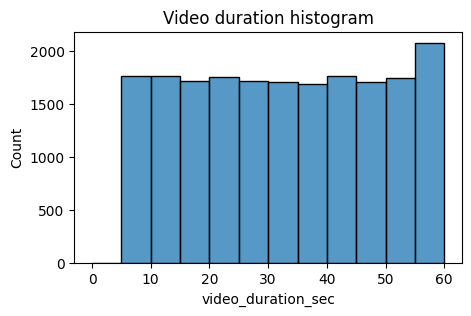

In [15]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_duration_sec'], bins=range(0,61,5))
plt.title('Video duration histogram')

Toutes les videos sont entre 5 et 60 secondes

Text(0.5, 1.0, 'Video view count histogram')

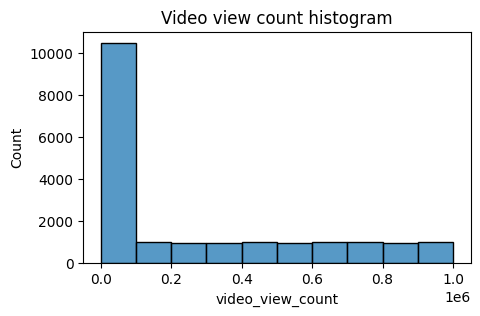

In [16]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_view_count'], bins=range(0,(10**6+1),10**5))
plt.title('Video view count histogram')

Distribution très asymétrique : La majorité des vidéos ont très peu de vues, et seules quelques vidéos atteignent un grand nombre de vues.

Effet "long tail" (queue longue) : Peu de vidéos sont virales, tandis qu’une énorme majorité reste avec un faible nombre de vues.

Potentiel de viralité : Certaines vidéos dépassent 200 000 à 1 000 000 de vues, ce qui suggère qu'un petit pourcentage des vidéos génère l’essentiel du trafic.

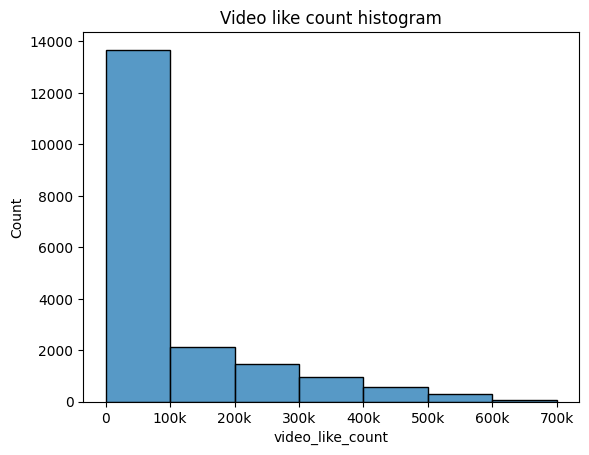

In [17]:
ax = sns.histplot(data['video_like_count'], bins=range(0,(7*10**5+1),10**5))
labels = [0] + [str(i) + 'k' for i in range(100, 701, 100)]
ax.set_xticks(range(0,7*10**5+1,10**5), labels=labels)
plt.title('Video like count histogram');

Distribution très asymétrique (long tail) :

La majorité des vidéos ont peu de likes (moins de 100k).
Très peu de vidéos atteignent des centaines de milliers de likes.

Phénomène de viralité :

Quelques vidéos accumulent des centaines de milliers de likes, ce qui suggère que seules certaines vidéos deviennent virales.
Un petit pourcentage de vidéos génère l’essentiel de l’engagement.

Engagement limité sur la plupart des vidéos :

La majorité des vidéos n’obtiennent pas beaucoup de likes malgré le nombre élevé de publications.
Cela peut être dû à un manque de visibilité, d’optimisation ou de contenu engageant.

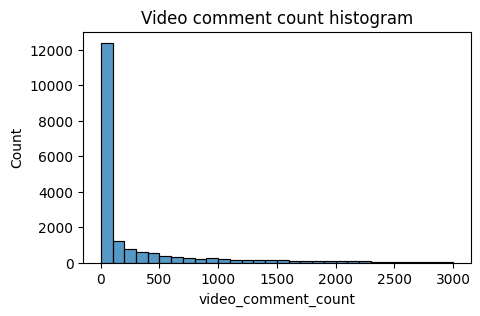

In [18]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video comment count histogram');

Encore une distibution tres asymétrique, peut de vidéos ont beaucoup de commentaires. La plus part des vidéos ont tres peu de commentaires

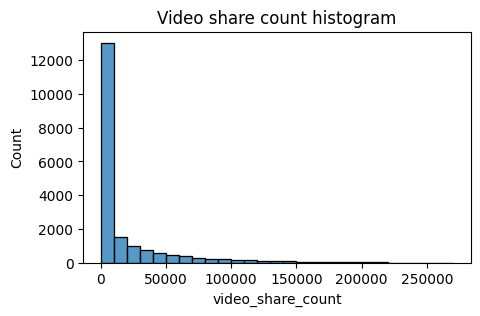

In [19]:
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video share count histogram');

L'écrasante majorité des vidéos comptaient moins de 10 000 partages .La distribution est très biaisée à droite.

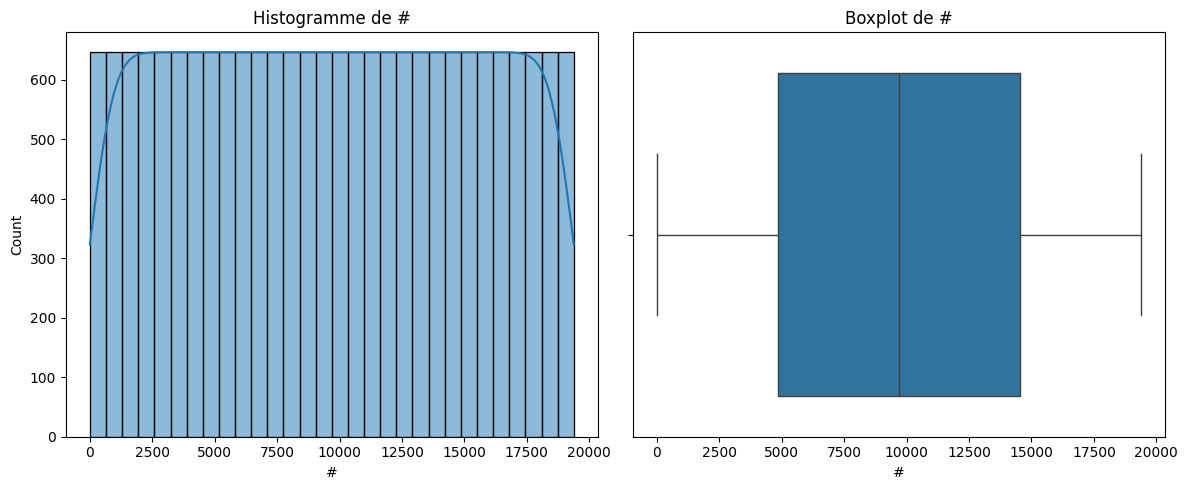

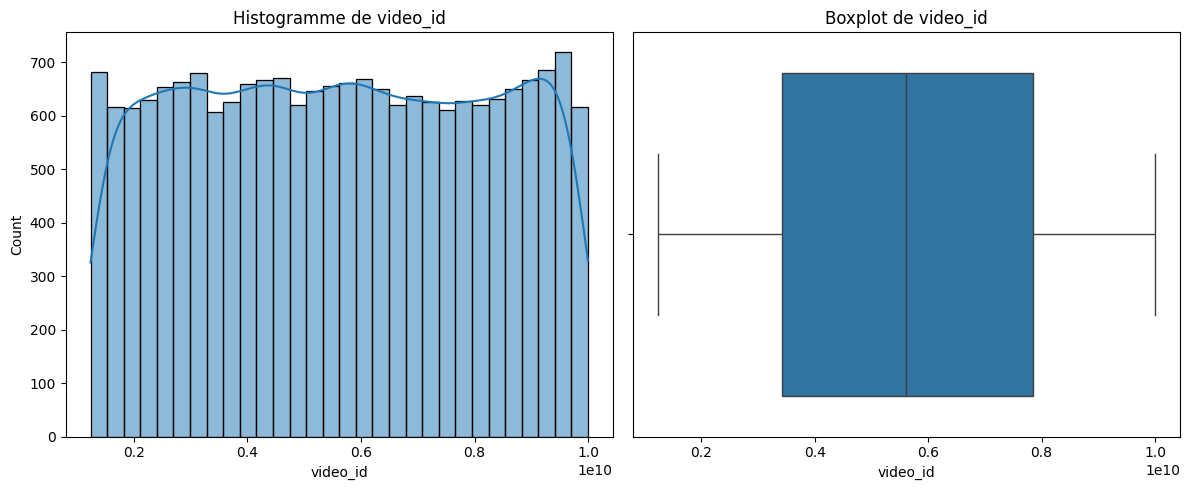

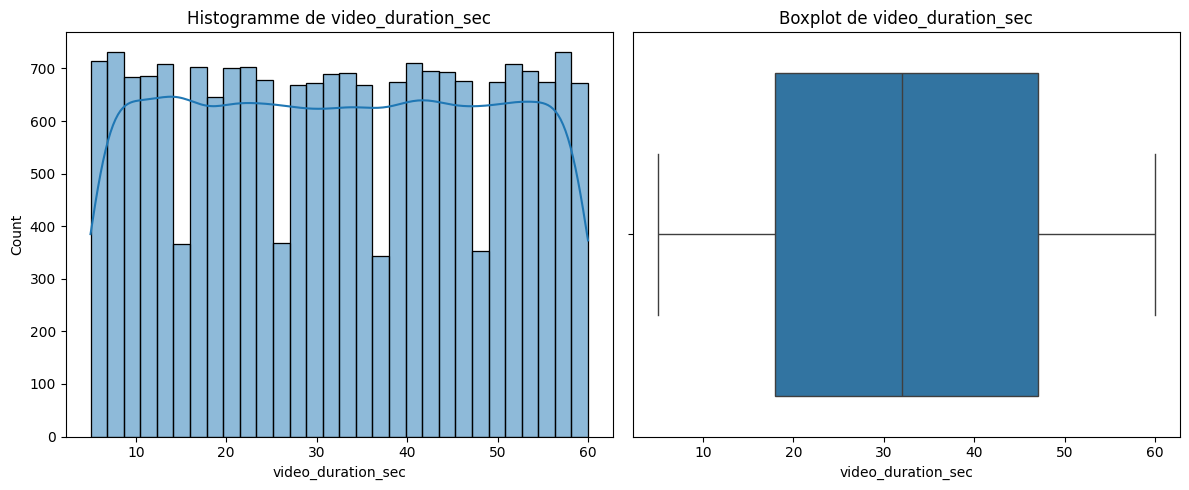

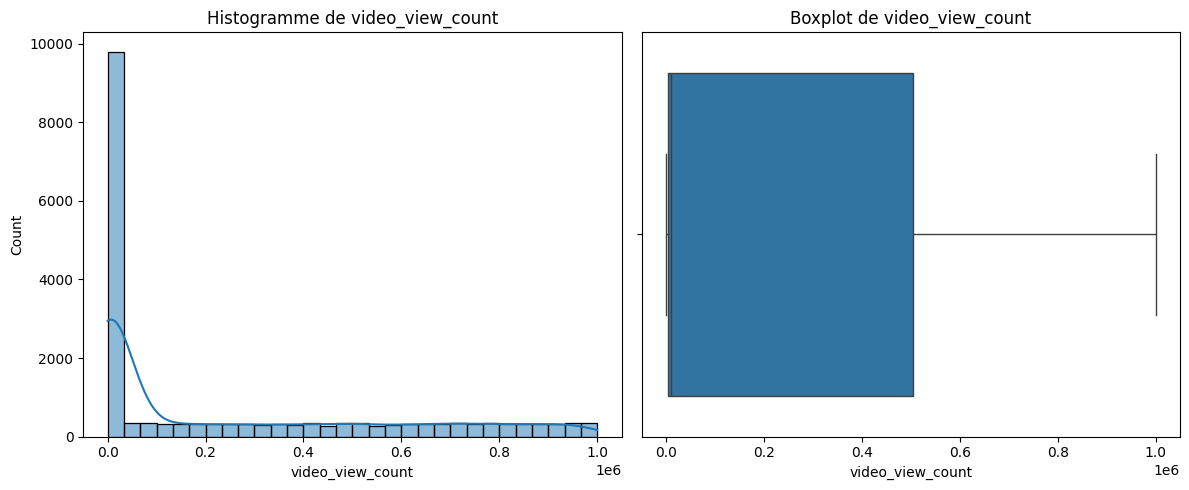

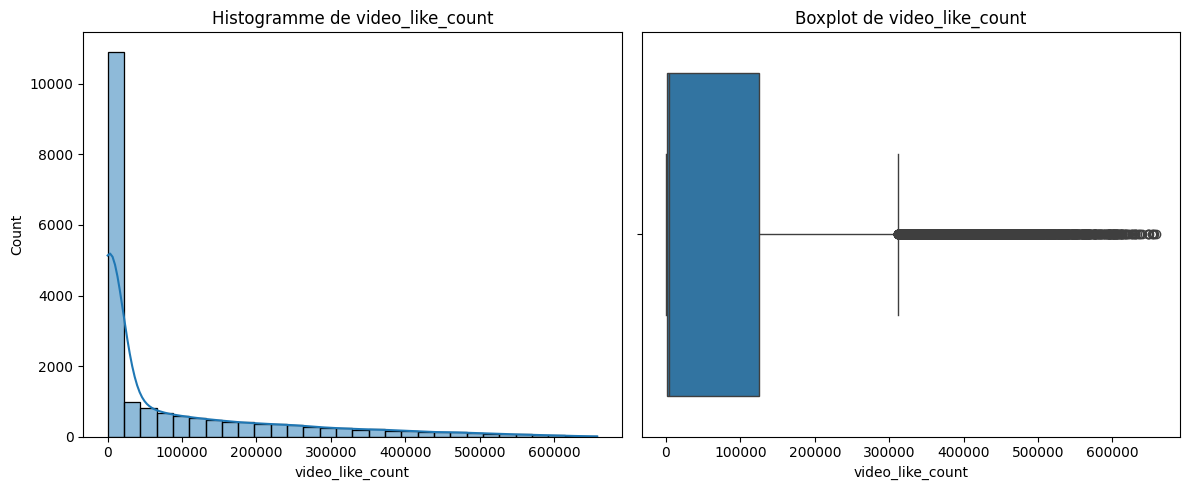

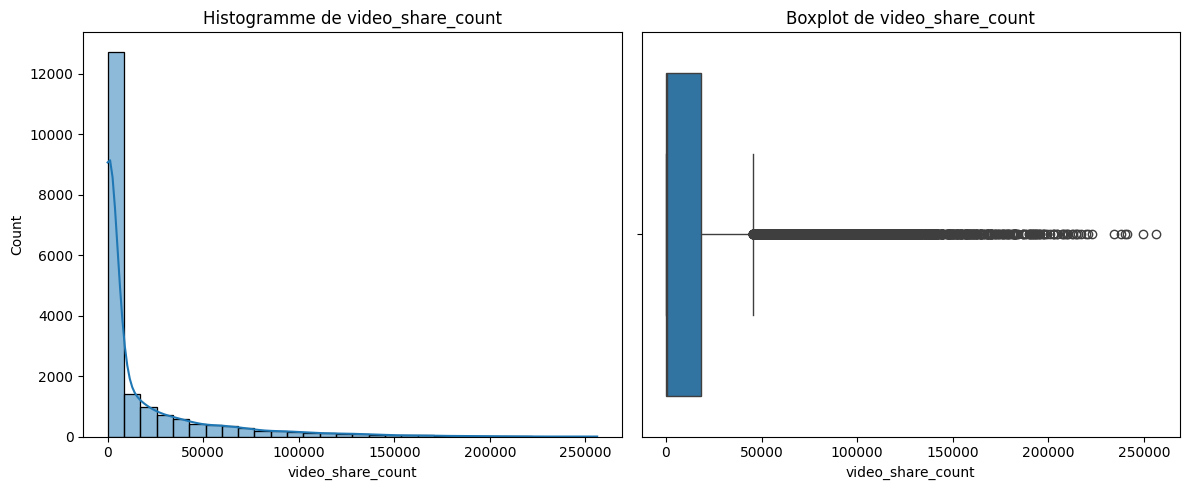

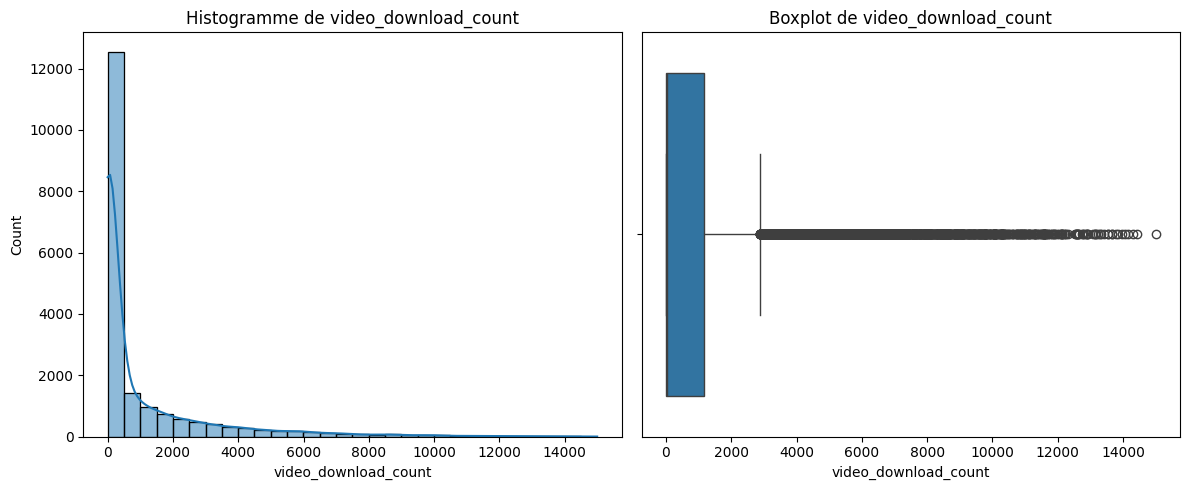

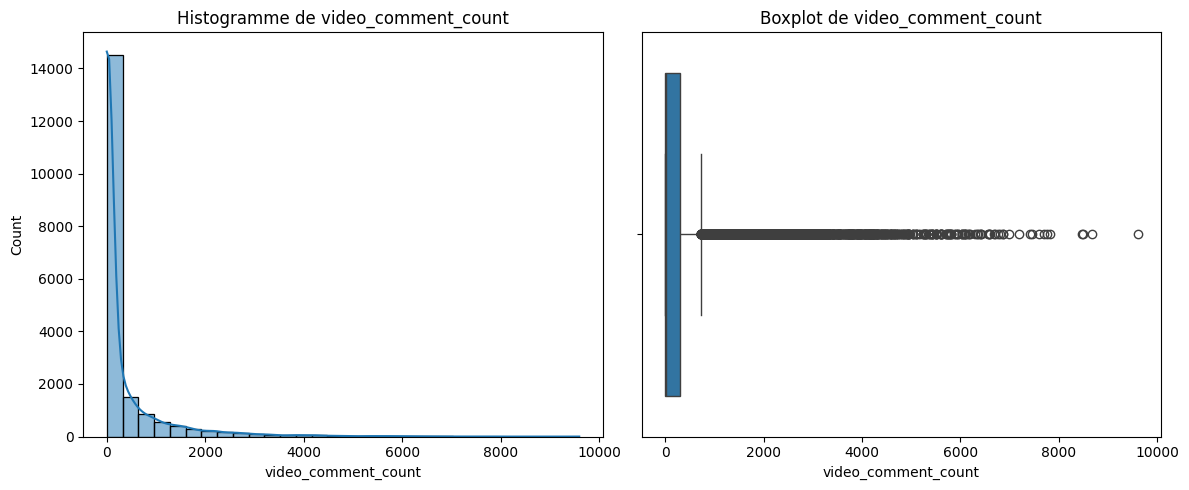

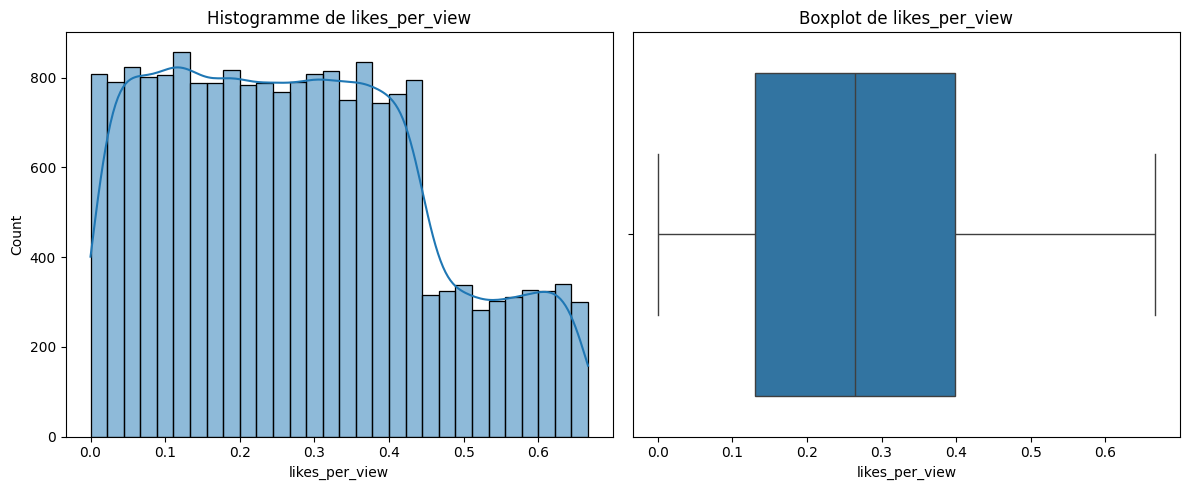

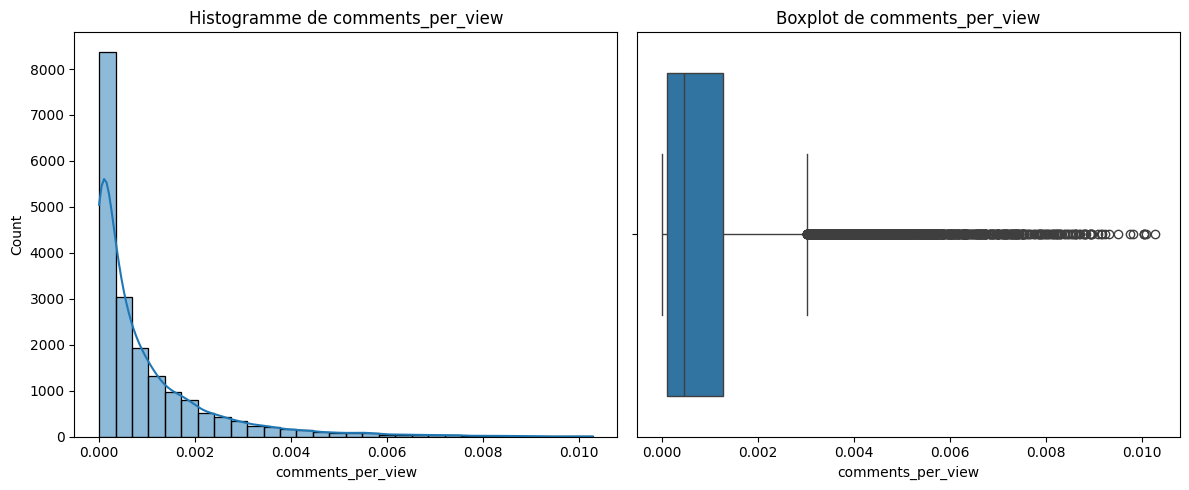

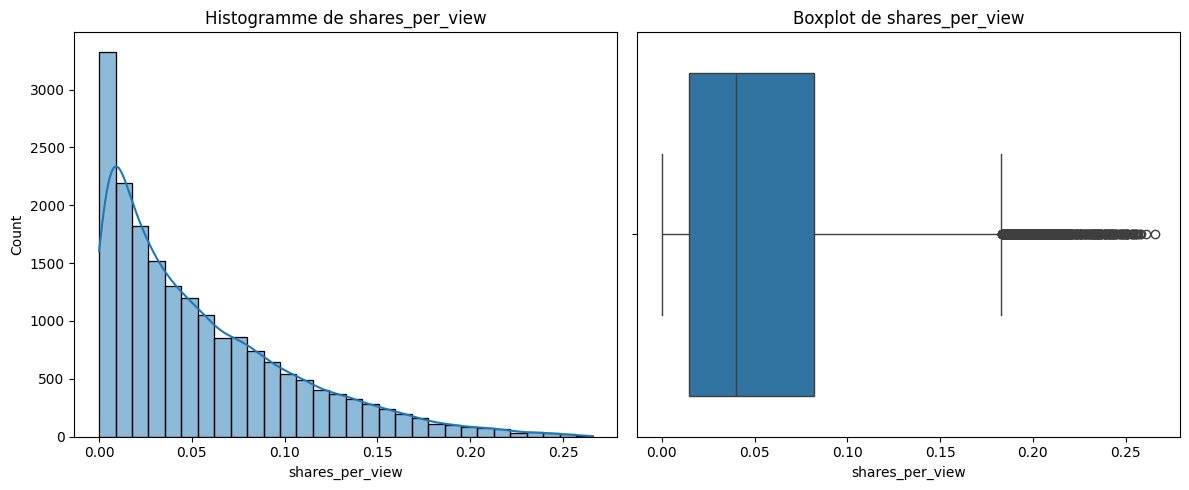

In [20]:
# Sélectionner uniquement les colonnes numériques
numeric_columns = data.select_dtypes(include=['number']).columns

# Créer les visualisations

for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 ligne, 2 colonnes (Histogramme + Boxplot)
    
    # Histogramme
    sns.histplot(data[col], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogramme de {col}")
    
    # Boxplot
    sns.boxplot(x=data[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    
    plt.tight_layout()
    plt.show()
    


In [21]:
# from itertools import combinations

# numeric_columns = ['video_view_count', 'video_like_count']  # 👉 Modifie cette liste selon tes besoins
# categorical_columns = ['claim_status', 'author_ban_status','verified_status']  # 👉 Spécifie manuellement les catégories à analyser

# # Générer des histogrammes pour chaque combinaison de variables catégoriques spécifiées
# for num_col in numeric_columns:
#     cat_combos = list(combinations(categorical_columns, 2))  # Liste des paires de catégories

#     # Définir la taille de la figure pour afficher les sous-plots
#     fig, axes = plt.subplots(len(cat_combos), 1, figsize=(12, 5 * len(cat_combos)))  
    
#     if len(cat_combos) == 1:  # Si une seule combinaison, éviter un problème d'indexation
#         axes = [axes]
    
#     for i, (cat1, cat2) in enumerate(cat_combos):
#         sns.histplot(data=data, x=num_col, hue=cat1, multiple="stack", kde=True, ax=axes[i])
#         axes[i].set_title(f"Histogramme de {num_col} en fonction de {cat1}")
#         axes[i].set_xlabel(num_col)
#         axes[i].set_ylabel("Fréquence")
#         axes[i].legend(title=cat1)
    
#     plt.tight_layout()  # Ajuster l'espacement entre les graphes
#     plt.show()

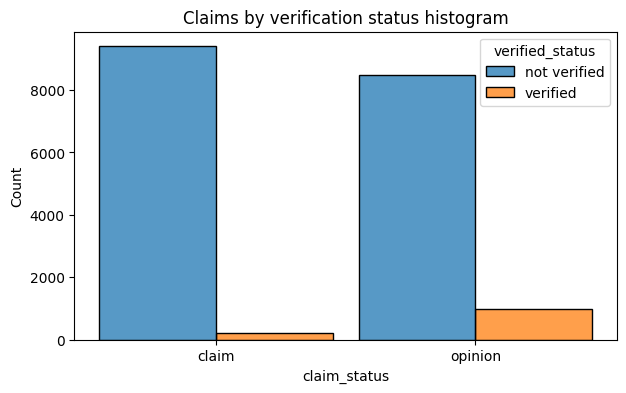

In [22]:
plt.figure(figsize=(7,4))
sns.histplot(data=data,
             x='claim_status',
             hue='verified_status',
             multiple='dodge',
             shrink=0.9)
plt.title('Claims by verification status histogram');

Il y a beaucoup moins d'utilisateurs vérifiés que les utilisateurs non vérifiés, mais les utilisateurs vérifiés sont beaucoup plus susceptibles de publier des opinions.

Text(0.5, 1.0, "Statut de réclamation par l'état de l'interdiction de l'auteur - compte")

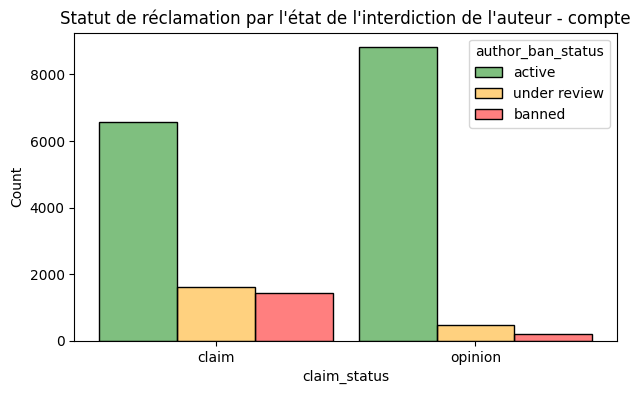

In [23]:
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title("Statut de réclamation par l'état de l'interdiction de l'auteur - compte")

Les vidéos "claim" sont plus nombreuses et plus sujettes aux interdictions (banned, under review).

Les vidéos "opinion" sont principalement postées par des auteurs actifs et sont moins bannies.

L’analyse des contenus "claim" pourrait permettre de mieux comprendre pourquoi elles sont plus souvent bannies.

C:\Users\yohar\AppData\Local\Temp\ipykernel_111956\3340194109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ban_status_counts,


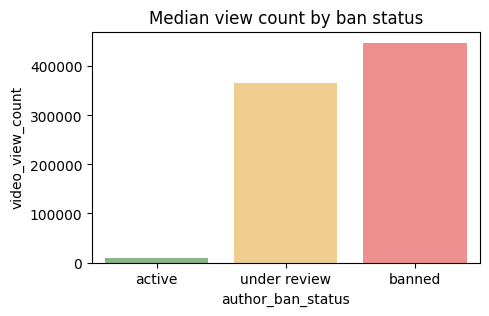

In [24]:
ban_status_counts = data.groupby(['author_ban_status']).median(
    numeric_only=True).reset_index()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            palette={'active':'green', 'under review':'orange', 'banned':'red'},
            alpha=0.5)
plt.title('Median view count by ban status');

Les vidéos bannies sont celles qui ont le plus de vues en médiane, suivies des vidéos sous surveillance.

Les vidéos d’auteurs actifs ont très peu de vues en comparaison.

Plus une vidéo devient populaire, plus elle risque d’être mise sous surveillance ou bannie.

In [25]:
data.groupby('claim_status')['video_view_count'].median()

claim_status
claim      501555.0
opinion      4953.0
Name: video_view_count, dtype: float64

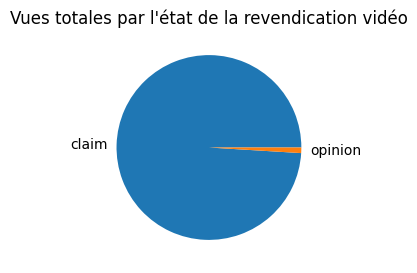

In [26]:
fig = plt.figure(figsize=(3,3))
plt.pie(data.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title("Vues totales par l'état de la revendication vidéo");

In [27]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count',
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr

    # Count the number of values that exceed the outlier threshold
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Nombre de valeurs aberrantes, {column}:', outlier_count)

Nombre de valeurs aberrantes, video_view_count: 2343
Nombre de valeurs aberrantes, video_like_count: 3468
Nombre de valeurs aberrantes, video_share_count: 3732
Nombre de valeurs aberrantes, video_download_count: 3733
Nombre de valeurs aberrantes, video_comment_count: 3882


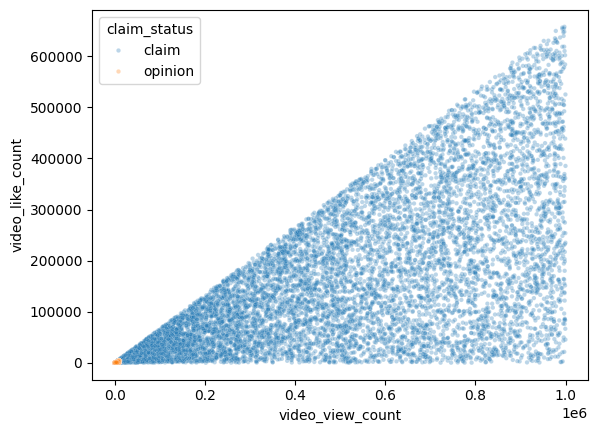

In [28]:
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.show()

Plus une vidéo a de vues, plus elle a tendance à recevoir de likes (corrélation positive).

Les vidéos "claim" sont dominantes et semblent plus engageantes que les vidéos "opinion".

Les vidéos "opinion" sont peu nombreuses et ne deviennent pas virales.

Les vidéos les plus populaires (1M+ vues) génèrent énormément de likes, ce qui suggère un engagement fort pour certains contenus spécifiques.

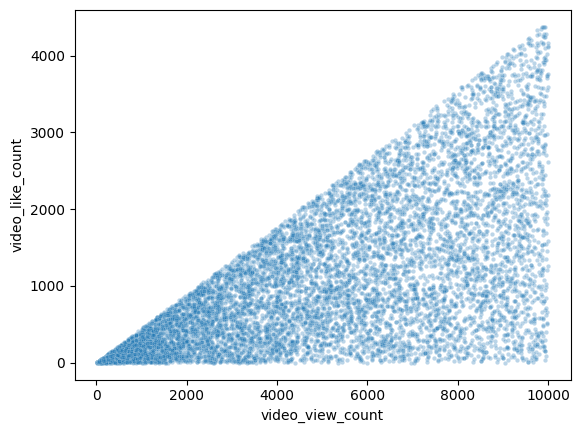

In [29]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = data[data['claim_status']=='opinion']
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3)
plt.show()

Corrélation forte entre les vues et les likes : Plus une vidéo a de vues, plus elle reçoit de likes.

Forme triangulaire : Toutes les vidéos ne convertissent pas les vues en likes au même taux, expliquant la dispersion des points.

Densité élevée dans la zone des faibles vues : La majorité des vidéos ont moins de 10 000 vues et un faible nombre de likes.

Quelques vidéos à fort engagement : Certaines vidéos atteignent plus de 4 000 likes, ce qui indique une forte interaction pour un sous-ensemble de vidéos.

## Conclusion Générale : Ce que Révèle l’Analyse
Les vidéos les plus populaires sont aussi celles qui risquent le plus d’être bannies → Viralité = plus grande exposition aux signalements et à la modération.

Une forte corrélation entre les vues et les likes → Mais certaines vidéos convertissent mieux que d’autres en termes d’engagement.

Les vidéos "claim" dominent l’engagement tandis que les vidéos "opinion" sont sous-représentées et moins populaires.

Le phénomène de "long tail" est évident → Très peu de vidéos deviennent virales, tandis que la majorité reste peu vue.